In [0]:
import numpy as np
import scipy.fftpack
import matplotlib.pyplot as plt

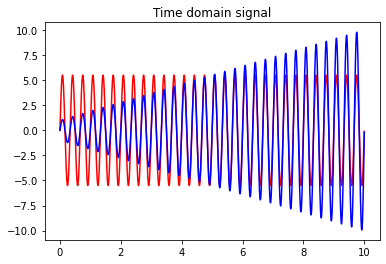

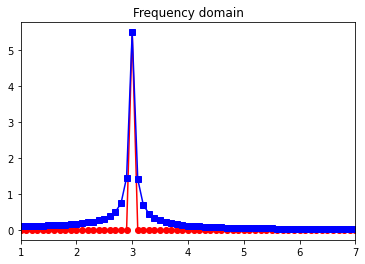

In [2]:
## amplitude non-stationarity

srate = 1000
t = np.arange(0,10,1/srate)
n = len(t)
f = 3 # frequency in Hz

# sine wave with time-increasing amplitude
ampl1 = np.linspace(1,10,n)
ampl2 = np.mean(ampl1)

# uncomment the next lines for an AM-radio-like signal
# y1 = 10*np.random.rand(10)
# fr = interpolate.interp1d(np.linspace(t[0],t[-1],10),y1,kind='cubic')
# ampl1 = np.abs(fr(t))


signal1 = np.multiply(ampl1 , np.sin(2*np.pi*f*t) )
signal2 = np.multiply(ampl2 , np.sin(2*np.pi*f*t) )


# obtain Fourier coefficients and Hz vector
signal1X = scipy.fftpack.fft(signal1)/n
signal2X = scipy.fftpack.fft(signal2)/n
hz = np.linspace(0,srate/2,int(np.floor(n/2)+1))

plt.plot(t,signal2,'r')
plt.plot(t,signal1,'b')
plt.title('Time domain signal')
plt.show()

plt.plot(hz,2*np.abs(signal2X[0:len(hz)]),'ro-')
plt.plot(hz,2*np.abs(signal1X[0:len(hz)]),'bs-')
plt.xlim([1,7])
plt.title('Frequency domain')
plt.show()

In the code we nowhere specified any non-3Hz frequecies. Still we could see some around (In the blue). This is because the non-stationarities require some additional energy in order to be able to reconstruct the signal properly.

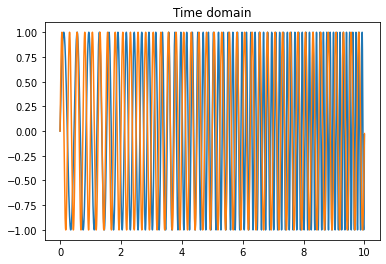

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


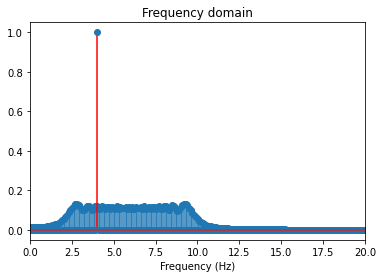

In [5]:
## Frequency nonstationarities

f  = [2, 10]
ff = np.linspace(f[0],np.mean(f),n)
signal1 = np.sin(2*np.pi*ff*t) #chirp
signal2 = np.sin(2*np.pi*np.mean(ff)*t) #A stationary time series

# compute FFTs
signal1X = scipy.fftpack.fft(signal1)/n
signal2X = scipy.fftpack.fft(signal2)/n
hz = np.linspace(0,srate/2,int(np.floor(n/2)))

plt.plot(t,signal1)
plt.plot(t,signal2)
plt.title('Time domain')
plt.show()

plt.stem(hz,2*np.abs(signal1X[0:len(hz)]))
plt.stem(hz,2*np.abs(signal2X[0:len(hz)]), 'r')
plt.xlabel('Frequency (Hz)')
plt.title('Frequency domain')
plt.xlim([0,20])
plt.show()

If I would have just shown you the frequency spectrum of the red signal, you could have easily traced the time signal of the same. While this would be very difficult in case of blue signal. Hence, the frequency non-stationarities can be a big problem. 

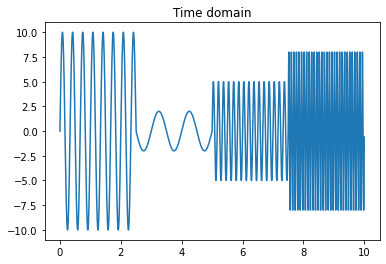

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


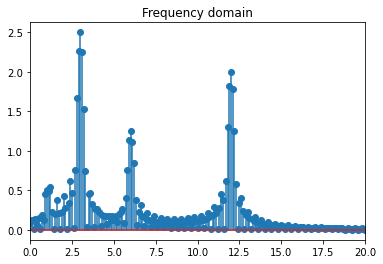

In [7]:
## sharp transitions

a = [10, 2, 5,  8]
f = [ 3, 1, 6, 12]

timechunks = np.round(np.linspace(0,n,len(a)+1))
sig1 = a[0]*np.sin(2*np.pi*f[0]*t[int(timechunks[0]):int(timechunks[1])] )
sig2 = a[1]*np.sin(2*np.pi*f[1]*t[int(timechunks[1]):int(timechunks[2])] )
sig3 = a[2]*np.sin(2*np.pi*f[2]*t[int(timechunks[2]):int(timechunks[3])] )
sig4 = a[3]*np.sin(2*np.pi*f[3]*t[int(timechunks[3]):int(timechunks[4])] )

signal = np.concatenate((sig1,sig2,sig3,sig4),axis=0)


signalX = scipy.fftpack.fft(signal)/n
hz = np.linspace(0,srate/2,int(np.floor(n/2)+1))

plt.plot(t,signal)
plt.title('Time domain')
plt.show()

plt.stem(hz,2*abs(signalX[0:len(hz)]))
plt.title('Frequency domain')
plt.xlim([0, 20])
plt.show()

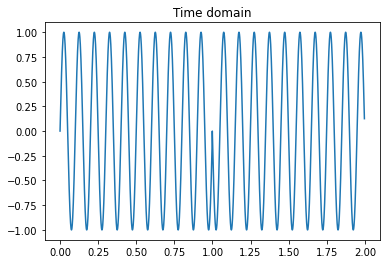

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


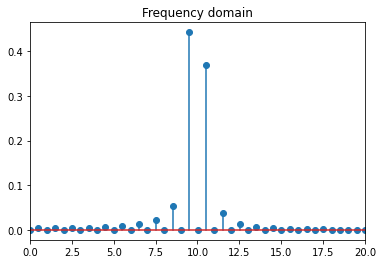

In [9]:
## phase reversal

srate = 1000
ttime = np.arange(0,1-1/srate,1/srate) # temp time, for creating half the signal
time  = np.arange(0,2-2/srate,1/srate) # signal's time vector
n = len(time)

signal = np.concatenate( (np.sin(2*np.pi*10*ttime),-np.sin(2*np.pi*10*ttime)) ,axis=0)

plt.plot(time,signal)
plt.title('Time domain')
plt.show()

# power spectrum
signalAmp = (2*np.abs( scipy.fftpack.fft(signal)/n ))**2
hz = np.linspace(0,srate/2,int(np.floor(n/2)+1))

plt.stem(hz,signalAmp[0:len(hz)])
plt.xlim([0,20])
plt.title('Frequency domain')
plt.show()

Though both are 10 Hz sine wave with just the phase difference, the amplitude at frequency domain at exacly 10 is zero. 

This happens because the left & right half of the signal as 10Hz tend to cancel each other. While the side lobes around it are actually energy due to non-stationarities.

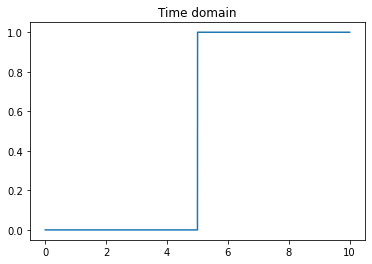

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


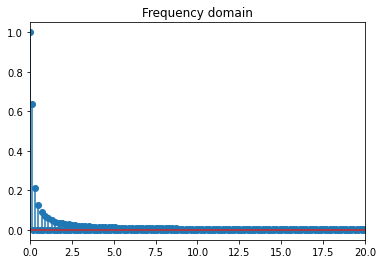

In [12]:
## edges and edge artifacts

n = len(t)
x = np.linspace(0,1,n)>.5

plt.plot(t,x)
plt.title('Time domain')
plt.show()

# FFT
xX = scipy.fftpack.fft(x)/n
hz = np.linspace(0,srate/2,int(np.floor(n/2)+1))

plt.stem(hz,2*np.abs(xX[0:len(hz)]))
plt.xlim([0,20])
plt.title('Frequency domain')
plt.show()

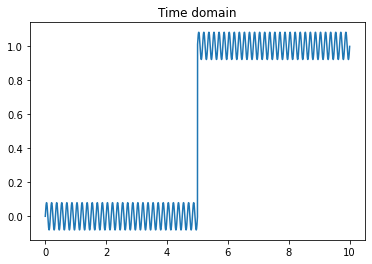

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()


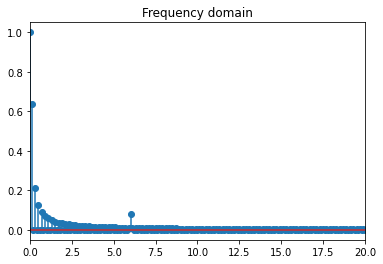

In [14]:
## edges and edge artifacts

n = len(t)
x = np.linspace(0,1,n)>.5

#nonstationarities do not prevent stationary signals from being easily observed
x = x + .08*np.sin(2*np.pi*6*t)

plt.plot(t,x)
plt.title('Time domain')
plt.show()

# FFT
xX = scipy.fftpack.fft(x)/n
hz = np.linspace(0,srate/2,int(np.floor(n/2)+1))

plt.stem(hz,2*np.abs(xX[0:len(hz)]))
plt.xlim([0,20])
plt.title('Frequency domain')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


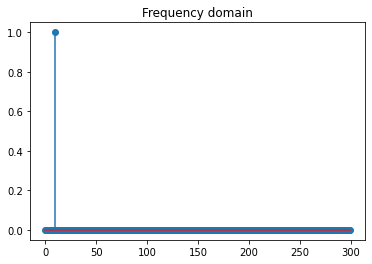

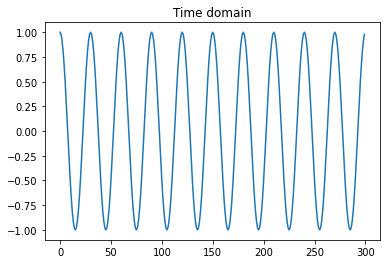

In [15]:
## spike in the frequency domain

# frequency spectrum with a spike
fspect = np.zeros(300)
fspect[10] = 1

# time-domain signal via iFFT
td_sig = np.real(scipy.fftpack.ifft(fspect)) * len(fspect)


# plot amplitude spectrum
plt.stem(fspect)
plt.title('Frequency domain')
plt.show()

# plot time domain signal
plt.plot(td_sig)
plt.title('Time domain')
plt.show()


A spike in the frequency domain is a sine wave in the time domain. Therefore, conversely, a sine wave in the time domain corresponds to just a spike in the frequency domain.